# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
pip install tensorflow


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy==1.23.5


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

2024-08-03 03:12:42.243751: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 03:12:43.286342: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 03:12:43.589939: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 03:12:44.187241: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 03:12:44.340066: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-03 03:12:45.316889: I tensorflow/core/platform/cpu_feature_gu

In [4]:
# Examine the shape of the dataset
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Number of classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

# Image dimensions
img_height, img_width, img_channels = x_train.shape[1], x_train.shape[2], x_train.shape[3]
print("Image dimensions: {}x{} with {} channels".format(img_height, img_width, img_channels))



Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Number of classes: 100
Image dimensions: 32x32 with 3 channels


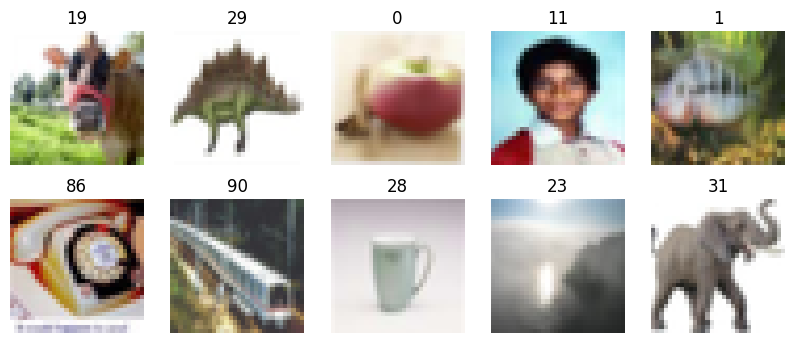

In [5]:
def plot_images(images, labels, class_names, num_rows, num_cols):
    plt.figure(figsize=(num_cols * 2, num_rows * 2))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.show()

# Display first 10 images from the training set
class_names = [str(i) for i in range(num_classes)]  # Placeholder for class names
plot_images(x_train, y_train, class_names, num_rows=2, num_cols=5)


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [6]:
# Normalize images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [7]:
# Convert labels to one-hot encoding
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)



In [8]:
# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Check the shapes of the resulting datasets
print("Training data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Test data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (32000, 32, 32, 3)
Validation data shape: (8000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (32000, 100)
Validation labels shape: (8000, 100)
Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [9]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(100, activation='softmax')
])

/usr/local/python/3.10.13/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

Categorical Crossentropy is choosen as the loss function, since it it used for multi-class classifcation problems wehre each label is one-hot encoded. It calculates the difference between the true label distribution and the predicted label distribution, making it suitable for our 100-class classification problem.


As for the optimizer, Adam is chosen since it is an adaptive learning rate optimizer that combines the advantages of two other extensions of stochastic gradient descent (SGD). It adjusts the learning rate based on the first and second moments of the gradients, which often results in faster convergence and better performance.

In [10]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    optimizer='adam',                 # Optimizer with adaptive learning rate
    metrics=['accuracy']              # Metric to evaluate the performance
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [11]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.0632 - loss: 4.2079 - val_accuracy: 0.2041 - val_loss: 3.3062
Epoch 2/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.2326 - loss: 3.1356 - val_accuracy: 0.2727 - val_loss: 2.9511
Epoch 3/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.3262 - loss: 2.6779 - val_accuracy: 0.3268 - val_loss: 2.7001
Epoch 4/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.3919 - loss: 2.3411 - val_accuracy: 0.3460 - val_loss: 2.6228
Epoch 5/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.4598 - loss: 2.0468 - val_accuracy: 0.3534 - val_loss: 2.5888
Epoch 6/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.5153 - loss: 1.7970 - val_accuracy: 0.3731 - val_loss: 2.6222
Epoch 7/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.5720 - loss: 1.5433 - val_accuracy: 0.3652 - val_loss: 2.7197
Epoch 8/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.6303 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Print the accuracy
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Obtain predictions
y_pred = model.predict(x_test)

# Convert predictions and true labels to class indices
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true_classes = tf.argmax(y_test, axis=1)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report
report = classification_report(y_true_classes, y_pred_classes, target_names=[str(i) for i in range(100)])

print("\nClassification Report:")
print(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3251 - loss: 8.2181
Test accuracy: 0.3248
Test loss: 8.1816
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.70      0.53       100
           1       0.46      0.33      0.39       100
           2       0.20      0.21      0.20       100
           3       0.15      0.13      0.14       100
           4       0.14      0.22      0.17       100
           5       0.22      0.34      0.27       100
           6       0.26      0.36      0.30       100
           7       0.33      0.24      0.28       100
           8       0.46      0.41      0.43       100
           9       0.53      0.38      0.44       100
          10       0.22      0.19      0.20       100
          11       0.20      0.19      0.19       100
          12       0.30      0.29      0.29       100
          13       0.27      0.25      0.26       100
         

- <b>Accuracy:</b> 0.3248
- <b>Other metric:</b> F1 Score
- <b>Reason for selection:</b> F1 Score is a harmonic mean of precision and recall. It is particularly useful in cases where the class distribution is imbalanced or when both false positives and false negatives are important. This metric balances the trade-off between precision and recall.
- <b>Value of metric:</b> 0.32
- <b>Interpretation of metric value:</b> The metric value is low, indicating that the model is not performing very well in identifying positive instances and reducing false positives and negatives.



### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

/usr/local/python/3.10.13/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


2024-08-03 02:28:45.040815: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 0.0605 - loss: 4.2066 - val_accuracy: 0.2045 - val_loss: 3.2844
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.2383 - loss: 3.0890 - val_accuracy: 0.2976 - val_loss: 2.8596
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.3364 - loss: 2.6066 - val_accuracy: 0.3339 - val_loss: 2.6346
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.4054 - loss: 2.3013 - val_accuracy: 0.3576 - val_loss: 2.5357
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.4665 - loss: 2.0273 - val_accuracy: 0.3742 - val_loss: 2.4777
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.5113 - loss: 1.8175 - val_accuracy: 0.3915 - val_loss: 2.4769
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.5579 - loss: 1.5981 - val_accuracy: 0.3905 - val_loss: 2.5329
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.6092 - loss: 1.40

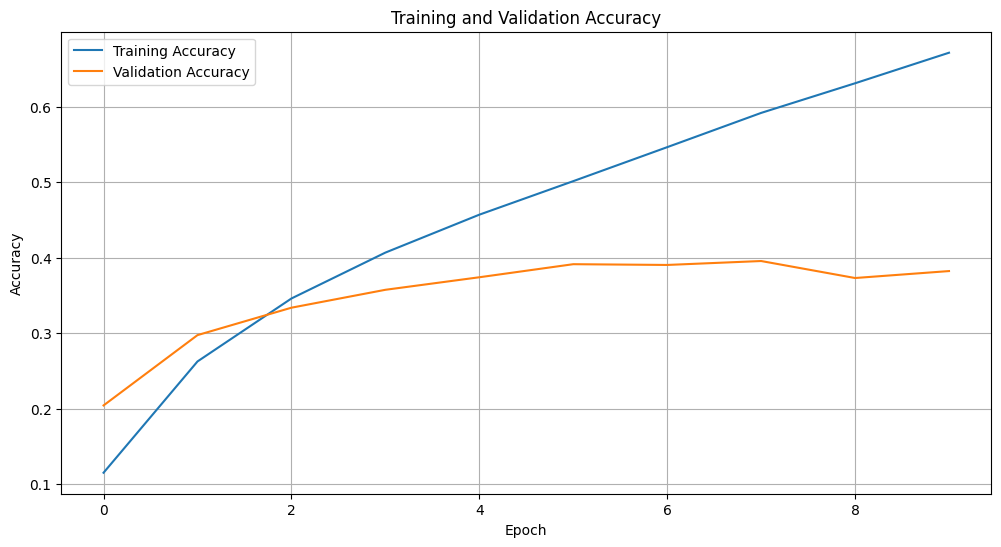

In [27]:
import matplotlib.pyplot as plt

# Assuming 'history' is the History object returned by model.fit()
history = model.history

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

Technique: Dropout is a regularization method that randomly sets a fraction of the input units to 0 at each update during training, which helps prevent overfitting. Reason of using dropout is that Dropout reduces overfitting by preventing complex co-adaptations of neurons. It is a simple yet effective regularization method.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [10]:
from tensorflow.keras import layers, models

# Define the CNN model with Dropout
model_with_dropout = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer

    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer

    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer

    # Flatten the output of the last convolutional block
    layers.Flatten(),
    
    # Fully connected layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer
    layers.Dense(100, activation='softmax')  # Output layer for 100 classes
])

# Print the model summary
model_with_dropout.summary()

# Compile the model
model_with_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Define the batch size
batch_size = 32

# Train the model
history_with_dropout = model_with_dropout.fit(
    x_train, y_train,
    epochs=30,  # Same number of epochs as before
    batch_size=batch_size,
    validation_data=(x_val, y_val),
    verbose=1
)


/usr/local/python/3.10.13/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 26s 25ms/step - accuracy: 0.0251 - loss: 4.4605 - val_accuracy: 0.1086 - val_loss: 3.8790
Epoch 2/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.1080 - loss: 3.8438 - val_accuracy: 0.1691 - val_loss: 3.4936
Epoch 3/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.1637 - loss: 3.5298 - val_accuracy: 0.2185 - val_loss: 3.2765
Epoch 4/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.1900 - loss: 3.3408 - val_accuracy: 0.2545 - val_loss: 3.1087
Epoch 5/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.2161 - loss: 3.2046 - val_accuracy: 0.2804 - val_loss: 2.9311
Epoch 6/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.2360 - loss: 3.0919 - val_accuracy: 0.2881 - val_loss: 2.9193
Epoch 7/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.2535 - loss: 2.9896 - val_accuracy: 0.2889 - val_loss: 2.8895
Epoch 8/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.2664 -

In [13]:
import tensorflow as tf
# Evaluate the model on the test set
test_loss_with_dropout, test_accuracy_with_dropout = model_with_dropout.evaluate(x_test, y_test, verbose=1)

# Print the accuracy and loss
print(f"Test accuracy with dropout: {test_accuracy_with_dropout:.4f}")
print(f"Test loss with dropout: {test_loss_with_dropout:.4f}")

# Obtain predictions
y_pred_with_dropout = model_with_dropout.predict(x_test)

# Convert predictions and true labels to class indices
y_pred_classes_with_dropout = tf.argmax(y_pred_with_dropout, axis=1)
y_true_classes = tf.argmax(y_test, axis=1)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix_with_dropout = confusion_matrix(y_true_classes, y_pred_classes_with_dropout)
report_with_dropout = classification_report(y_true_classes, y_pred_classes_with_dropout, target_names=[str(i) for i in range(100)])

print("\nClassification Report with Dropout:")
print(report_with_dropout)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3954 - loss: 2.3991
Test accuracy with dropout: 0.3926
Test loss with dropout: 2.3891
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Classification Report with Dropout:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       100
           1       0.45      0.45      0.45       100
           2       0.28      0.35      0.31       100
           3       0.20      0.17      0.18       100
           4       0.16      0.20      0.18       100
           5       0.28      0.38      0.32       100
           6       0.60      0.38      0.47       100
           7       0.59      0.43      0.50       100
           8       0.48      0.48      0.48       100
           9       0.63      0.45      0.53       100
          10       0.21      0.19      0.20       100
          11       0.30      0.20      0.24       100
          12       0.49      0.39      0.43       100
          13       0.34 

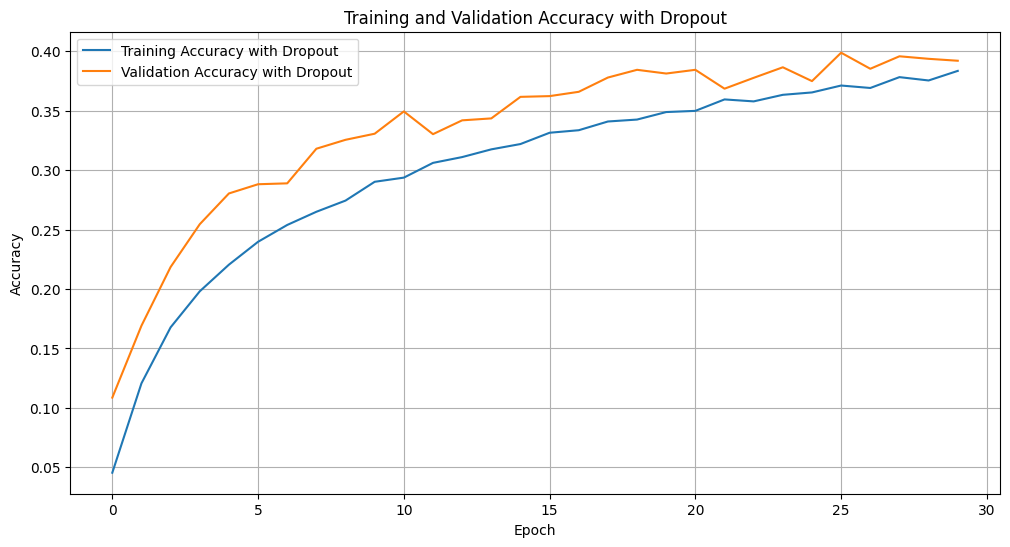

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.plot(history_with_dropout.history['accuracy'], label='Training Accuracy with Dropout')
# Plot validation accuracy
plt.plot(history_with_dropout.history['val_accuracy'], label='Validation Accuracy with Dropout')

plt.title('Training and Validation Accuracy with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.